### Titanic Survior

Predict whether a passenger survived the Titanic sinking

In [2]:
import os                         # for file‐path operations
import pandas as pd               # dataframes & I/O
import numpy as np                # numerical ops
import matplotlib.pyplot as plt   # plotting (histograms, bar charts) 

## 2. Load Data

In [3]:
# Adjust the folder name if needed (e.g., 'challange' → 'challenge')
train_df = pd.read_csv(r"C:\code\Kaggle Titanic challange\train.csv")
test_df  = pd.read_csv(r"C:\code\Kaggle Titanic challange\test.csv")

In [4]:
train_df.head()
train_df.info()
test_df.head()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

## 3. Data Overview

In [6]:
# Quick peek at the first few rows
train_df.head()

# Summary statistics for numeric columns
train_df.describe()

# Missing‐value counts
train_df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 4. Target Distribution

Survived
0    549
1    342
Name: count, dtype: int64


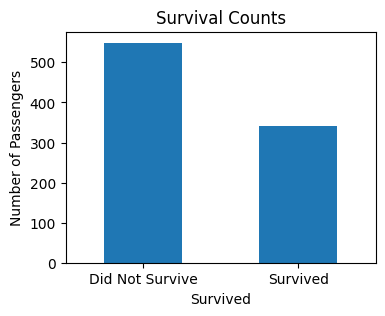

In [7]:
counts = train_df['Survived'].value_counts()
print(counts)

# Optional: visual bar chart
plt.figure(figsize=(4,3))
counts.plot(kind='bar')
plt.xticks([0,1], ['Did Not Survive','Survived'], rotation=0)
plt.ylabel('Number of Passengers')
plt.title('Survival Counts')
plt.show()

### 5.1 Survival Rate by Pclass

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


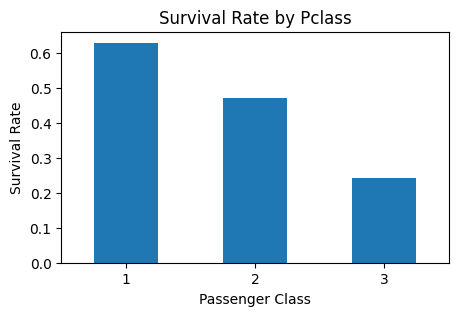

In [9]:
# Calculate survival rate per class
class_surv = train_df.groupby('Pclass')['Survived'].mean()
print(class_surv)

# Bar chart
plt.figure(figsize=(5,3))
class_surv.plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Pclass')
plt.show()


### 5.2 Survival Rate by Sex

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


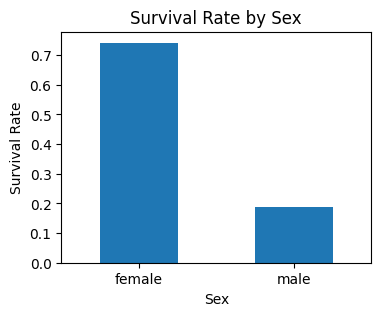

In [10]:
sex_surv = train_df.groupby('Sex')['Survived'].mean()
print(sex_surv)

plt.figure(figsize=(4,3))
sex_surv.plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Sex')
plt.show()


### 5.3 Survival Rate by Embarked

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


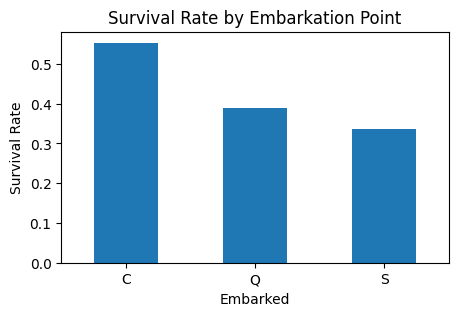

In [12]:
emb_surv = train_df.groupby('Embarked')['Survived'].mean()
print(emb_surv)

plt.figure(figsize=(5,3))
emb_surv.plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('Embarked')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Embarkation Point')
plt.show()


### 6. Numerical Feature Analysis

### 6.1 Age Distribution & Survival

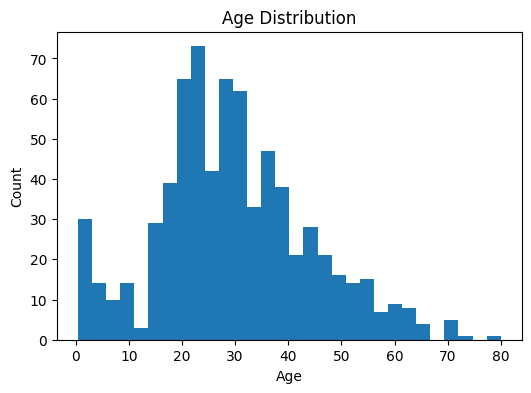

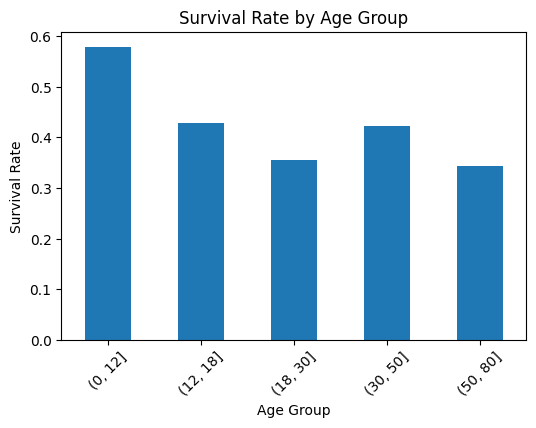

In [15]:
# 1. Overall Age distribution
plt.figure(figsize=(6,4))
plt.hist(train_df['Age'].dropna(), bins=30)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

# 2. Survival rate by Age bins
age_bins = [0, 12, 18, 30, 50, 80]
train_df['AgeBin'] = pd.cut(train_df['Age'], bins=age_bins)
age_surv = train_df.groupby('AgeBin', observed=True)['Survived'].mean()

plt.figure(figsize=(6,4))
age_surv.plot(kind='bar')
plt.xticks(rotation=45)
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Age Group')
plt.show()


### 6.2 Fare Distribution & Survival

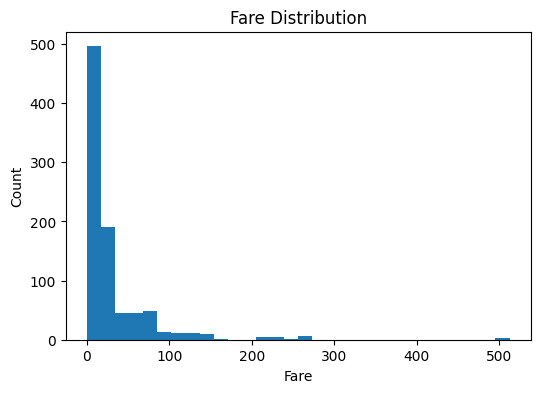

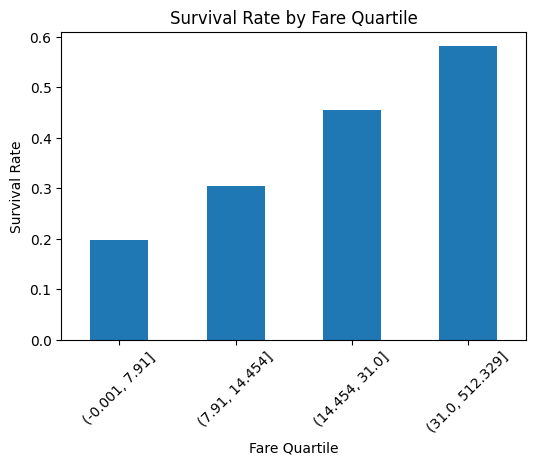

In [18]:
# 1. Overall Fare distribution
plt.figure(figsize=(6,4))
plt.hist(train_df['Fare'].dropna(), bins=30)
plt.xlabel('Fare')
plt.ylabel('Count')
plt.title('Fare Distribution')
plt.show()

# 2. Survival rate by Fare bins (quartiles)
train_df['FareBin'] = pd.qcut(train_df['Fare'], 4)
fare_surv = train_df.groupby('FareBin', observed=True)['Survived'].mean()

plt.figure(figsize=(6,4))
fare_surv.plot(kind='bar')
plt.xticks(rotation=45)
plt.xlabel('Fare Quartile')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Fare Quartile')
plt.show()


### 6.3 Missing Values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
AgeBin         177
FareBin          0
dtype: int64


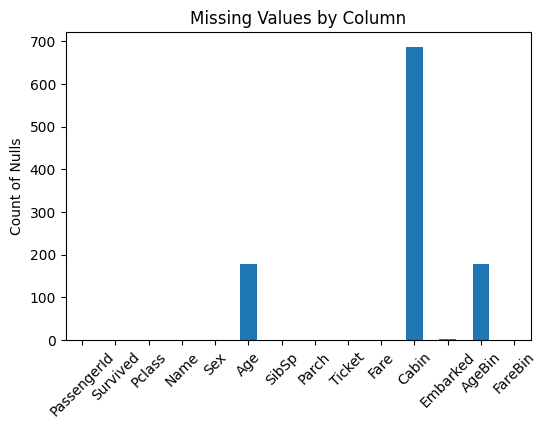

In [20]:
# Count missing values again (to include AgeBin/FareBin)
missing = train_df.isnull().sum()
print(missing)

# Visualize missingness (simple bar)
plt.figure(figsize=(6,4))
missing.plot(kind='bar')
plt.xticks(rotation=45)
plt.ylabel('Count of Nulls')
plt.title('Missing Values by Column')
plt.show()

### 7. Feature Engineering Plan

In [22]:
# Work on copies so we don’t overwrite the originals
df = train_df.copy()
df_test = test_df.copy()

### 7.1 Handle Missing Value

In [25]:
# 7.1 Handle Missing Values (revised to avoid chained-assignment warnings)

# Embarked (only 2 missing in train)
for dataset in (df, df_test):
    most_common = dataset['Embarked'].mode()[0]
    dataset['Embarked'] = dataset['Embarked'].fillna(most_common)

# Age: median by Pclass & Sex
age_medians = df.groupby(['Pclass','Sex'])['Age'].median()
df['Age']      = df.apply(lambda row: age_medians.loc[row.Pclass, row.Sex] 
                                       if pd.isnull(row.Age) else row.Age, axis=1)
df_test['Age'] = df_test.apply(lambda row: age_medians.loc[row.Pclass, row.Sex] 
                                             if pd.isnull(row.Age) else row.Age, axis=1)

# Fare: only one missing in test
median_fare = df['Fare'].median()
df_test['Fare'] = df_test['Fare'].fillna(median_fare)

# Cabin: fill missing with 'U' for Unknown
for dataset in (df, df_test):
    dataset['Cabin'] = dataset['Cabin'].fillna('U')

### 7.2 Create New Features

In [26]:
# Title from Name + rare-title grouping
title_map = {
    'Mlle':'Miss', 'Ms':'Miss', 'Mme':'Mrs',
    'Lady':'Other','Countess':'Other','Don':'Other','Sir':'Other',
    'Dona':'Other','Jonkheer':'Other','Rev':'Other','Dr':'Other',
    'Col':'Other','Major':'Other','Capt':'Other'
}

for dataset in (df, df_test):
    # Extract title
    titles = dataset['Name'].str.extract(r',\s*([^\.]+)\.', expand=False)
    # Replace rare titles
    dataset['Title'] = titles.replace(title_map).fillna('Other')

# Family size and alone flag
for dataset in (df, df_test):
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    dataset['IsAlone']     = (dataset['FamilySize'] == 1).astype(int)

# Deck from Cabin (first letter)
for dataset in (df, df_test):
    dataset['Deck'] = dataset['Cabin'].str[0]

### 7.3 Binning

In [27]:
# Age bins (using same edges as in EDA)
age_bins = [0, 12, 18, 30, 50, 80]
for dataset in (df, df_test):
    dataset['AgeBin'] = pd.cut(dataset['Age'], bins=age_bins, labels=False, include_lowest=True)

# Fare quartile bins
for dataset in (df, df_test):
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4, labels=False)

# Quick peek at the new features
print(df[['Title','FamilySize','IsAlone','Deck','AgeBin','FareBin']].head())

  Title  FamilySize  IsAlone Deck  AgeBin  FareBin
0    Mr           2        0    U       2        0
1   Mrs           2        0    C       3        3
2  Miss           1        1    U       2        1
3   Mrs           2        0    C       3        3
4    Mr           1        1    U       3        1


### 8.1 Preprocessing & Pipeline

In [29]:
# After you construct X and y, cast them explicitly to float64:
X = np.array(X, dtype=np.float64)
y = np.array(y, dtype=np.float64).reshape(-1, 1)

# Redefine sigmoid to ensure z is an array:
def sigmoid(z):
    z = np.array(z, dtype=np.float64)
    return 1 / (1 + np.exp(-z))

# And then proceed as before:
def compute_cost(X, y, w):
    m = len(y)
    h = sigmoid(X.dot(w))
    h = np.clip(h, 1e-10, 1-1e-10)
    return (-1/m) * (y.T.dot(np.log(h)) + (1-y).T.dot(np.log(1-h)))

def compute_gradient(X, y, w):
    m = len(y)
    h = sigmoid(X.dot(w))
    return (1/m) * X.T.dot(h - y)

def gradient_descent(X, y, alpha=0.1, iterations=1000):
    w = np.zeros((X.shape[1], 1), dtype=np.float64)
    for i in range(iterations):
        grad = compute_gradient(X, y, w)
        w -= alpha * grad
    return w

# Now run:
w_final = gradient_descent(X, y, alpha=0.1, iterations=1000)
print("Final cost:", compute_cost(X, y, w_final))

Final cost: [[0.40355552]]


### 8.2 Record Cost Over Iterations

In [30]:
def gradient_descent_diagnostic(X, y, alpha=0.1, iterations=5000, log_interval=100):
    w = np.zeros((X.shape[1], 1), dtype=np.float64)
    costs = []
    for i in range(1, iterations+1):
        grad = compute_gradient(X, y, w)
        w -= alpha * grad
        if i % log_interval == 0:
            cost = compute_cost(X, y, w).item()
            costs.append((i, cost))
    return w, costs

# Run with diagnostics
w_diag, cost_log = gradient_descent_diagnostic(X, y, alpha=0.1, iterations=5000)

# Unzip iteration numbers and cost values
iters, cost_vals = zip(*cost_log)

### 8.3 Plot the Cost Curve

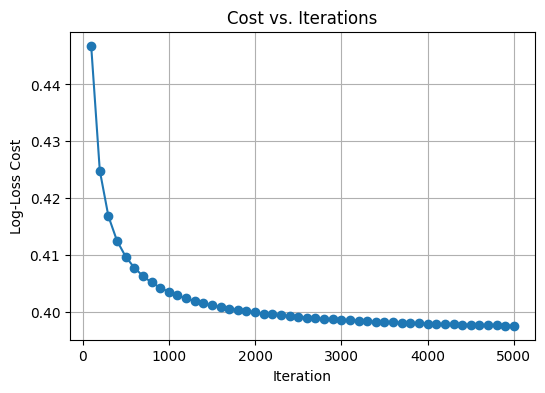

### 9.1 Compute Training Accuracy

In [32]:
# Use your final weights
w_final = w_diag

# Predicted probabilities and classes
probs_train = sigmoid(X.dot(w_final))
preds_train = (probs_train >= 0.5).astype(int)

# Training accuracy
train_acc = (preds_train == y).mean()
print(f"Training Accuracy: {train_acc * 100:.2f}%")


Training Accuracy: 83.61%


### 10 Sigmoid Visualization

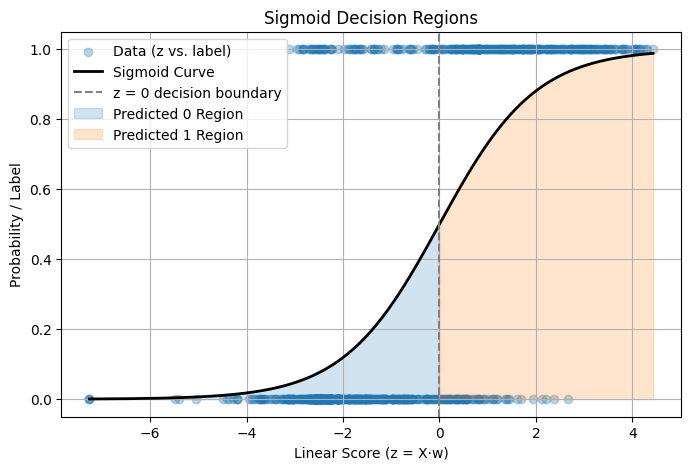

In [39]:
def plot_sigmoid_shaded(X, y, w, title="Sigmoid with Decision Regions"):
    """
    Plots:
      • Data points (z vs. true label)
      • Sigmoid curve
      • Shaded regions for p < 0.5 and p >= 0.5
      • Decision boundary line at z = 0 (p=0.5)
    """
    # Compute model scores
    z = X.dot(w).ravel()
    y_flat = y.ravel()

    # Smooth curve domain
    z_vals = np.linspace(z.min(), z.max(), 300)
    sigmoid_curve = 1 / (1 + np.exp(-z_vals))

    plt.figure(figsize=(8,5))
    # 1. Scatter data
    plt.scatter(z, y_flat, alpha=0.3, label='Data (z vs. label)')
    # 2. Sigmoid curve
    plt.plot(z_vals, sigmoid_curve, color='black', linewidth=2, label='Sigmoid Curve')
    # 3. Vertical decision boundary
    plt.axvline(0.0, color='grey', linestyle='--', label='z = 0 decision boundary')

    # 4. Shade regions
    #   region where sigmoid < 0.5 (to the left of z=0)
    plt.fill_between(z_vals, 0, sigmoid_curve,
                     where=(z_vals <= 0),
                     color='C0', alpha=0.2, label='Predicted 0 Region')
    #   region where sigmoid >= 0.5 (to the right of z=0)
    plt.fill_between(z_vals, 0, sigmoid_curve,
                     where=(z_vals >= 0),
                     color='C1', alpha=0.2, label='Predicted 1 Region')

    plt.xlabel('Linear Score (z = X·w)')
    plt.ylabel('Probability / Label')
    plt.title(title)
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

# Call this as your last cell
plot_sigmoid_shaded(X, y, w_final, title="Sigmoid Decision Regions")


### 11. Generate Submission

In [38]:
# 9. Generate Submission (with robust sigmoid)

import numpy as np
import pandas as pd

# 1. Robust sigmoid
def sigmoid(z):
    z_arr = np.array(z, dtype=np.float64)
    return 1 / (1 + np.exp(-z_arr))

# 2. Compute probabilities on test set
probs = sigmoid(X_test.dot(w_final))

# 3. Threshold at 0.5
preds = (probs >= 0.5).astype(int)

# 4. Build submission DataFrame
submission = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Survived': preds.ravel()
})

# 5. Quick preview
print(submission.head())

# 6. Export CSV
submission.to_csv('titanic_submission.csv', index=False)

   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1
